In [3]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
%matplotlib inline
#%config InlineBackend.figure_format = 'svg' 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import pickle as pkl
import dtreeviz
import imodelsx.process_results
from sklearn.tree import plot_tree
import sys
import numpy as np
import viz
import imodelsx.augtree.data
import imodelsx
import sklearn.tree
sys.path.append('../experiments/')
results_dir = '../results/feb11/'

r = imodelsx.process_results.get_results_df(results_dir, use_cached=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Filter results
rd = r
default_params = {
    'max_features': 1,
    'ngrams': 2,
    'refinement_strategy': 'llm',
    'use_llm_prompt_context': 0,
    'use_stemming': 0,
    'n_estimators': 1,
    'subsample_frac': 1,
}
for k, v in default_params.items():
    rd = rd[rd[k] == v]
rd = rd[rd.dataset_name == 'emotion']
# rd = rd[rd.dataset_name == 'rotten_tomatoes']
rd = rd[rd.max_depth == 3]

### Load an individual model

model_name llm_tree
acc 0.7137161084529505 depth 3 dset emotion
> Tree(max_depth=3 max_features=1 refine=llm)
> ------------------------------------------------------
Stump(val=0.53 n=[6231, 487]) + more, heightened, extra, prolonged, added...(4 more)
   Stump(val=0.52 n=[6186, 45]) + safe
      Stump(val=0.52 n=[1065, 5121]) -- miserable, unappreciated, gloomy, disillusioned, pathetic...(48 more)
         Neg n=1065 val=0.043
         Pos n=5121 val=0.616
      Pos n=45 val=1.000
   Stump(val=0.71 n=[387, 100]) + feel more
      Stump(val=0.67 n=[28, 359]) -- more than
         Neg n=28 val=0.357
         Pos n=359 val=0.694
      Stump(val=0.87 n=[61, 39]) + to
         Neg n=61 val=0.820
         Pos n=39 val=0.949

['+ more, heightened, extra, prolonged, added...(4 more)', '+ safe', '+ feel more', '-- miserable, unappreciated, gloomy, disillusioned, pathetic...(48 more)', '', '-- more than', '+ to', '', '', '', '', '', '']


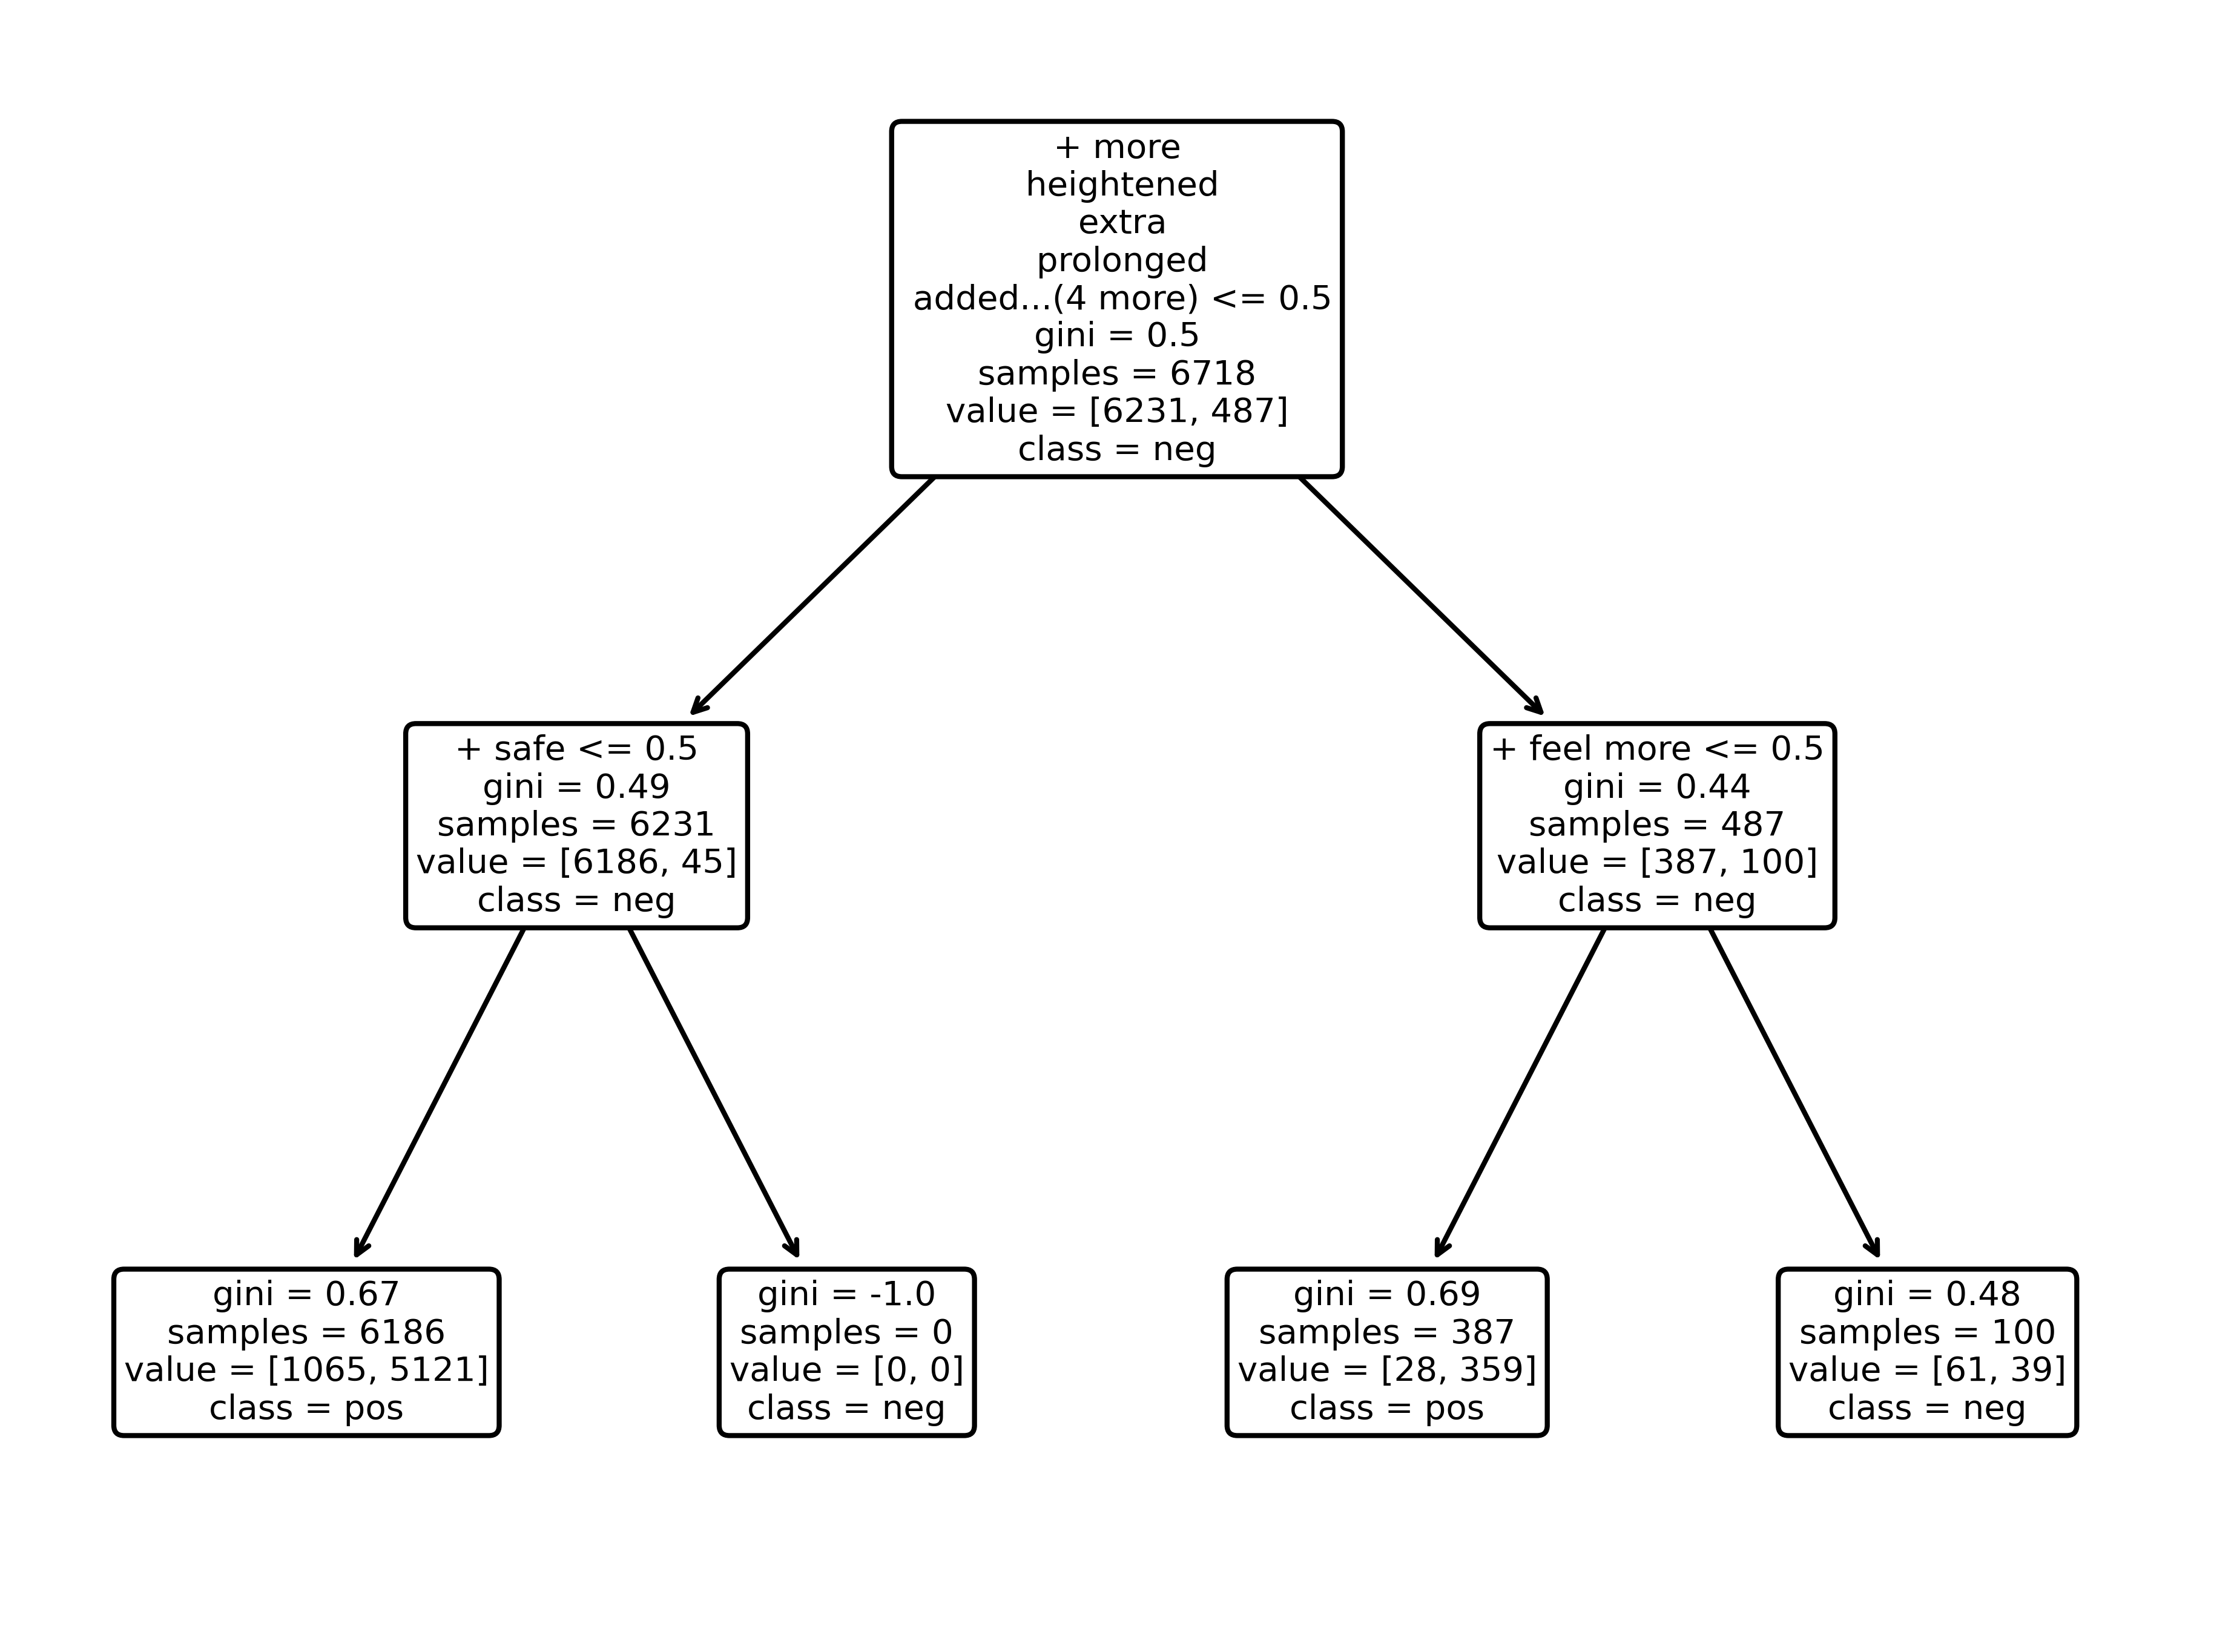

In [6]:
for model_name in ['llm_tree']:
# for model_name in ['llm_tree', 'decision_tree']:
    print('model_name', model_name)
    run_args = rd[(rd.model_name == model_name)].sort_values(by='accuracy_cv').iloc[-1]
    # run_args = rd[(rd.model_name == 'llm_tree')].sort_values(by='max_depth').iloc[-1]

    print('acc', run_args.accuracy_test, 'depth', run_args.max_depth, 'dset', run_args.dataset_name)
    model = pkl.load(open(join(run_args.save_dir_unique, 'model.pkl'), 'rb'))


    if model_name == 'llm_tree':
        dt, feature_names = imodelsx.viz.extract_sklearn_tree_from_llm_tree(model, n_classes=2, dtreeviz_dummies=False)
        print(model)
        print(feature_names)
    else:
        dt = model
        feature_names = run_args.feature_names
    feat_names = ['\n'.join(n.split(',')) for n in feature_names]
    sklearn.tree.plot_tree(dt, feature_names=feat_names, class_names=['neg', 'pos'],
                            precision=2, rounded=True)
    plt.show()

# Fancy visualization with dtreeviz

In [7]:
X_train, X_cv, X_test, y_train, y_cv, y_test, feature_names = \
    llm_tree.data.get_all_data(run_args)
# viz.save_tree(model, X_train.toarray(), y_train, feature_names, fname='tree.svg')
viz_model = dtreeviz.model(
    model,
    X_train=X_train.toarray(),
    y_train=np.array(y_train),
    feature_names=np.array(feature_names),
    target_name='y',
    class_names=np.array(['neg', 'pos'])
)
v = viz_model.view()
# v.show() # don't call this, opens a pop-up
v.save('tree.svg')
# display(v)

No config specified, defaulting to: emotion/split
Found cached dataset emotion (/home/chansingh/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>                                                                                      │
│                                                                                                  │
│    1 X_train, X_cv, X_test, y_train, y_cv, y_test, feature_names = \                             │
│    2 │   llm_tree.data.get_all_data(run_args)                                                    │
│    3 # viz.save_tree(model, X_train.toarray(), y_train, feature_names, fname='tree.svg')         │
│ ❱  4 viz_model = dtreeviz.model(                                                                 │
│    5 │   model,                                                                                  │
│    6 │   X_train=X_train.toarray(),                                                              │
│    7 │   y_train=np.array(y_train),                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: module 'dtreeviz' has no attribute 'model'